<img src="../images/CD_image.png" width="600">

<div style="background-color:white; text-align:center; padding:10px; color:black; margin-left:0px; border-radius: 10px; font-family:Trebuchet MS; font-size:45px">
<strong>Descriptive analysis for a Score Model</strong>
</div>

# Environment

**Spark session**

In [1]:
!python3 --version

Python 3.9.2


In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

## Libraries

For this notebook I have to load **fns_four.py** file, created by myself, because I am gonna to analize this dataset in order to create a score model. However, in this notebook I will only analize descriptively the variables.

In [4]:
from fns_four import *
%config InlineBackend.figure_format = "retina"

# Load dataset

In [5]:
Ruta = "../data/"
df = sqlContext.read.format("parquet").load(Ruta + "tmp_evol3")

In [9]:
print("Rows: {0:,}\tColumns: {1:,}".format(df.count(), len(df.columns)))

Rows: 20,000	Columns: 12


In [7]:
df.columns

['incmpl_d',
 'muestra',
 'segmento',
 'cohorte',
 'num_1',
 'num_2',
 'num_3',
 'num_4',
 'num_5',
 'cat_1',
 'cat_2',
 'cat_3']

In [8]:
df.show(5)

+--------+-------+--------+-------+-------+-------+------+-------+------+-----+-----+-----+
|incmpl_d|muestra|segmento|cohorte|  num_1|  num_2| num_3|  num_4| num_5|cat_1|cat_2|cat_3|
+--------+-------+--------+-------+-------+-------+------+-------+------+-----+-----+-----+
|       0|  Train|       1| 201504| 3.4456|-2.0638|4.7921|10.4608|3.6112|    2|    4|    1|
|       0|  Train|       2| 201612|-3.2747| 5.8328|3.6542| 8.2745|3.8997|    4|    3|    1|
|       0|  Train|       1| 201609| 0.4855|   5.78|4.1253|10.9207|5.5821|    1|    1|    2|
|       0|   Test|       1| 201510| 4.7664|-2.8398|1.8446| 5.9683|11.507|    2|    2|    3|
|       1|  Train|       1| 201501|-0.7854| 2.6188|0.4987| -2.683|8.9182|    5|    3|    2|
+--------+-------+--------+-------+-------+-------+------+-------+------+-----+-----+-----+
only showing top 5 rows



# Description of variables

In [10]:
str_cols = [item[0] for item in df.dtypes if item[1].startswith('string')]
num_cols = [x for x in df.columns if x not in str_cols]
print("String variables:", str_cols)
print("Numerical variables:", num_cols)

String variables: ['muestra']
Numerical variables: ['incmpl_d', 'segmento', 'cohorte', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'cat_1', 'cat_2', 'cat_3']


## Numeric variables

In [11]:
summ = df.select(num_cols).summary().toPandas().transpose()
new_header = summ.iloc[0]
summ = summ[1:]
summ.columns = new_header
summ

summary,count,mean,stddev,min,25%,50%,75%,max
incmpl_d,20000,0.09885,0.2984679742561713,0,0,0,0,1
segmento,20000,1.3487,0.4765707355506612,1,1,1,2,2
cohorte,20000,201556.6099,50.12136200800322,201501,201507,201601,201607,201612
num_1,20000,1.7582011350000044,2.9196046698239093,-9.8513,-0.2335,1.5591,3.733,12.5018
num_2,20000,2.7882336649999884,3.883726399090735,-11.1967,0.1512,2.6476,5.3775,18.4476
num_3,20000,3.817738415000013,4.867589689701483,-16.6181,0.5413,3.7339,7.0932,24.7593
num_4,20000,4.856655920000019,5.890050031194342,-18.723,0.8628,4.789,8.7893,26.9558
num_5,20000,5.801301905000023,6.834954174647581,-20.0616,1.1844,5.6821,10.3526,36.4148
cat_1,20000,2.99125,1.4128599527774541,1,2,3,4,5
cat_2,20000,2.39,0.9158285522393695,1,2,2,3,4


## Strings variables

In [12]:
str_table = df.groupBy("muestra").count().toPandas()
str_table["percentage"] = str_table["count"] / str_table["count"].sum() * 100
str_table

,muestra,count,percentage
0,Test,6142,30.71
1,Train,13858,69.29


## Analysis with functions from .py file

In [13]:
two = cp_two(sqlContext)

In [14]:
param_dict = {"checkpoints2":{"var_cohorte":"cohorte"},
              "var_obj":"incmpl_d"}

In [16]:
%%time
y = two.def_universe(df, param_dict)
print("----------")

Universe analysis was completed.
----------
CPU times: user 16 ms, sys: 4.96 ms, total: 21 ms
Wall time: 1.66 s


In [17]:
y[0]

,Number of registers,Number of columns
0,20000,12


In [18]:
y[1]

,Minimum cohorte,Maximum cohorte
0,201501,201612


In [19]:
y[2]

,Year,count,Proportion
0,2015,9978,0.4989
1,2016,10022,0.5011


In [20]:
y[3]

,Year,Total,Bads,Goods,TM
0,2015,9978,972,9006,0.0974
1,2016,10022,1005,9017,0.1003


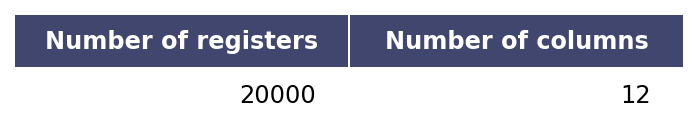

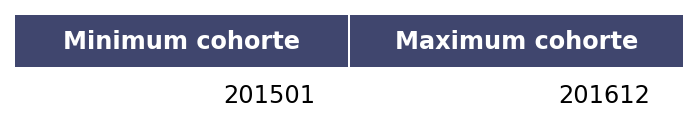

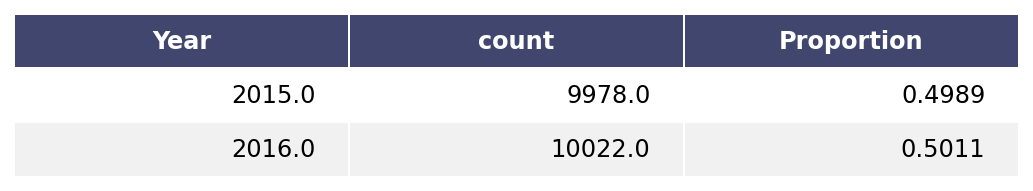

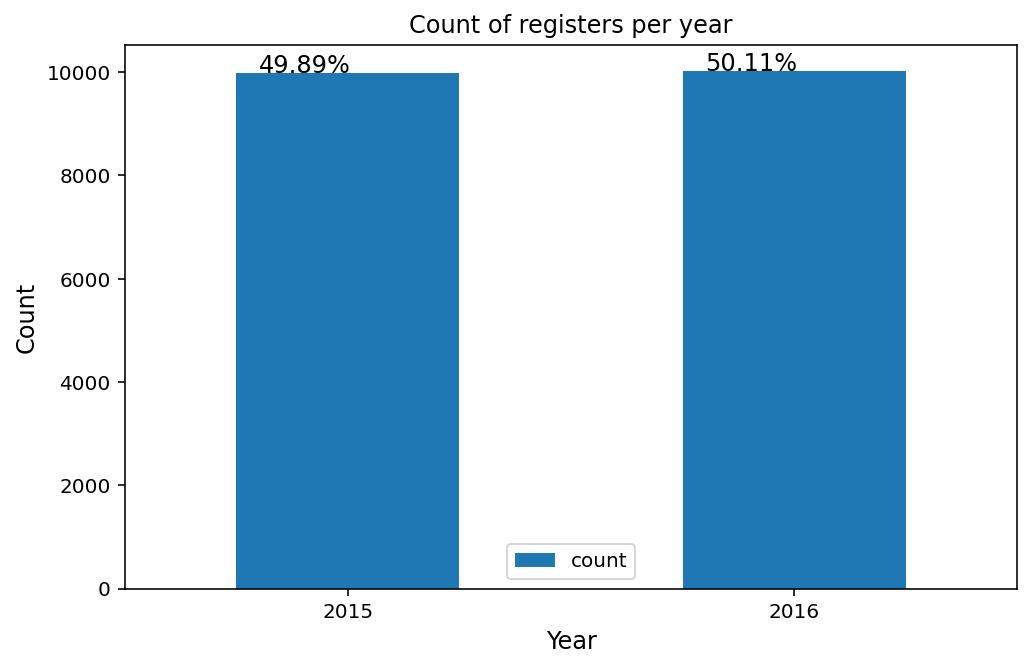

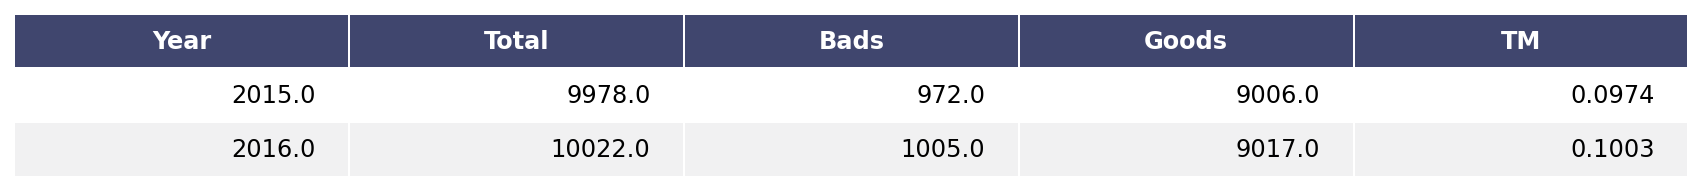

In [21]:
Ruta = "./outputs/"
Utilerias.def_universe_plot(y, Ruta)

# Initial distribution and mature analysis

## Init mature

In [22]:
param_dict = {"var_obj":"incmpl_d",
              "checkpoints2":{"var_segm":"segmento",
                              "var_sample":"muestra"}}

In [24]:
%%time
w = two.init_mature(df, param_dict)
print("----------")

Init mature analysis was completed.
----------
CPU times: user 28.9 ms, sys: 8.49 ms, total: 37.4 ms
Wall time: 2.76 s


In [25]:
w[0]

,segment,count,Proportion
0,1,13026,0.6513
1,2,6974,0.3487


In [26]:
w[1]

,sample,count,Proportion
0,Test,6142,0.3071
1,Train,13858,0.6929


In [27]:
w[2]

,segment,sample,count,Proportion
0,1,Train,8995,0.44975
1,1,Test,4031,0.20155
2,2,Train,4863,0.24315
3,2,Test,2111,0.10555


In [28]:
w[3]

,incmpl,count,Proportion
0,0,18023,0.90115
1,1,1977,0.09885


In [29]:
w[4]

,sample,incmpl,count,Proportion
0,Train,0,12466,0.62330
1,Test,0,5557,0.27785
2,Train,1,1392,0.06960
3,Test,1,585,0.02925


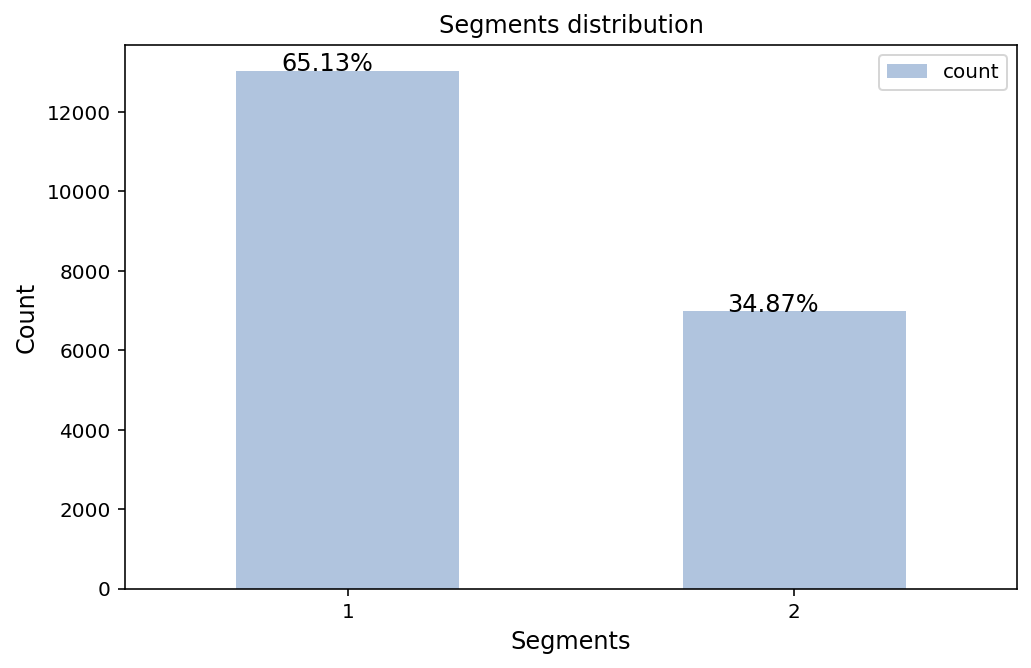

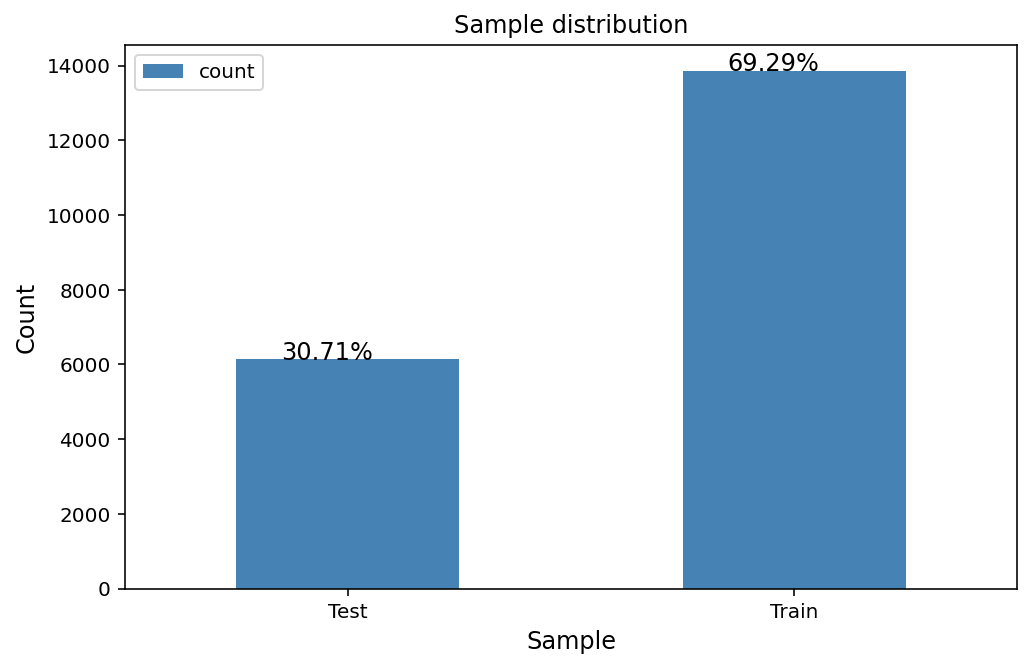

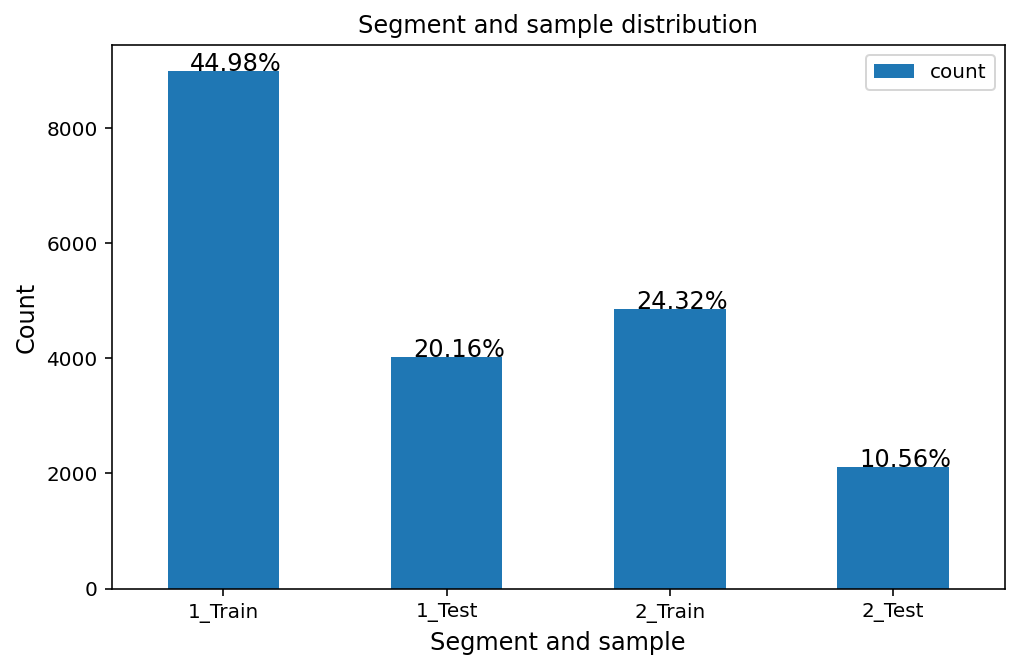

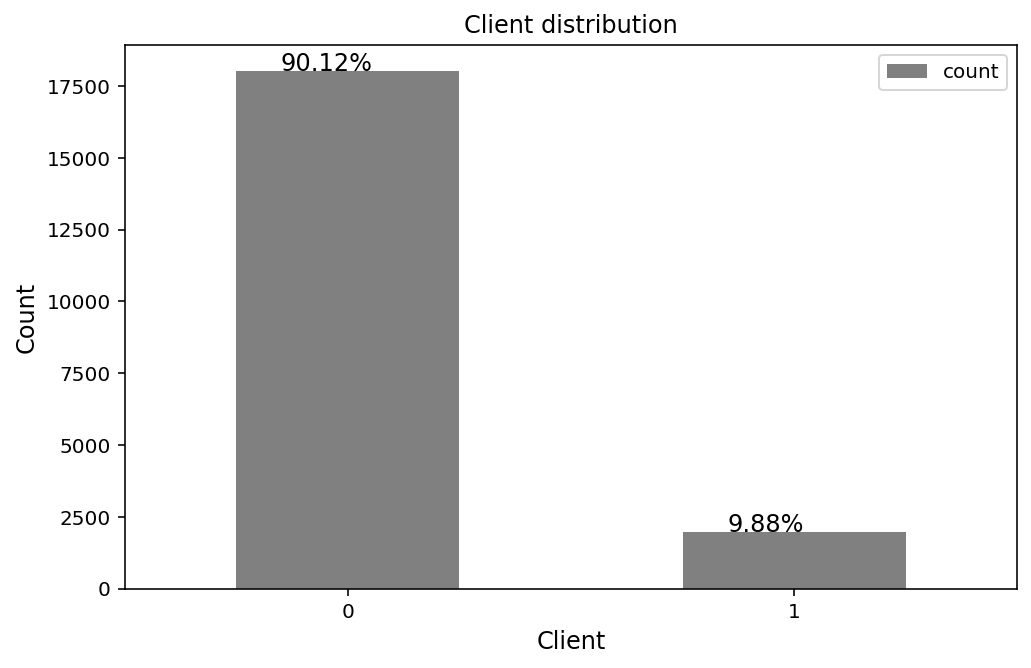

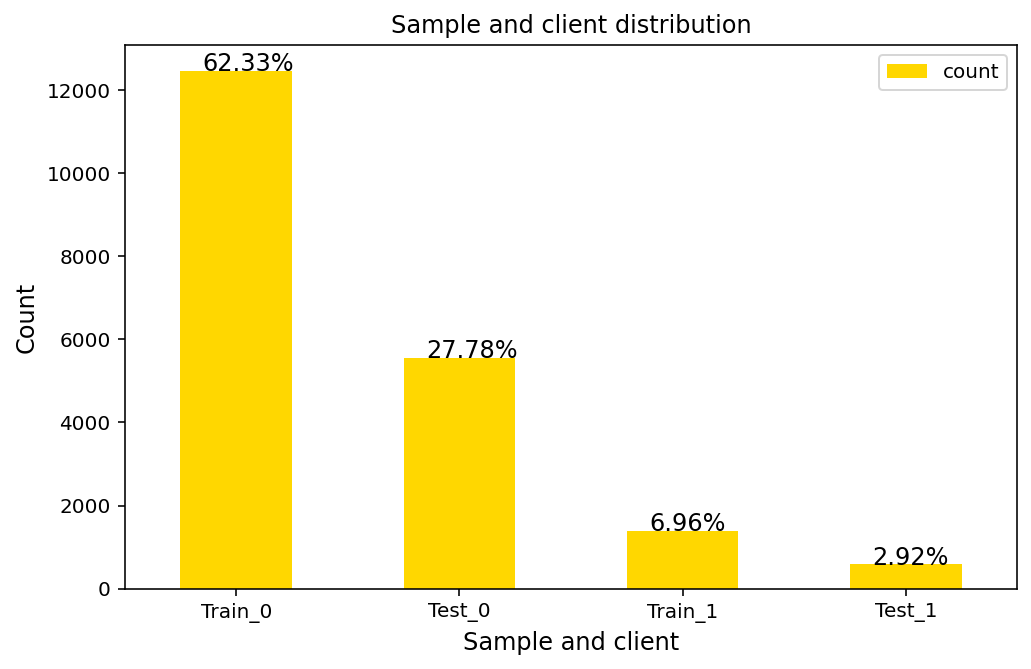

In [30]:
w1 = Utilerias.init_mature_plot(w, Ruta)

## Evolution of cohorte

In [31]:
param_dict = {"checkpoints2":{"var_segm":"segmento",
                              "var_cohorte":"cohorte"},
              "var_obj":"incmpl_d"}

In [33]:
%%time
z = two.evol_cohorte(df, param_dict)
print("----------")

Evolution cohorte analysis was completed.
----------
CPU times: user 17.5 ms, sys: 5.25 ms, total: 22.7 ms
Wall time: 1.65 s


In [34]:
z[0].head()

,cohorte,total,bads,goods,tm,segment
0,201501,534,54,480,0.1011,1
1,201502,546,39,507,0.0714,1
2,201503,499,55,444,0.1102,1
3,201504,586,71,515,0.1212,1
4,201505,541,51,490,0.0943,1


In [35]:
z[1].head()

,cohorte,total,bads,goods,tm,segment
0,201501,282,26,256,0.0922,2
1,201502,301,36,265,0.1196,2
2,201503,273,27,246,0.0989,2
3,201504,315,29,286,0.0921,2
4,201505,279,23,256,0.0824,2


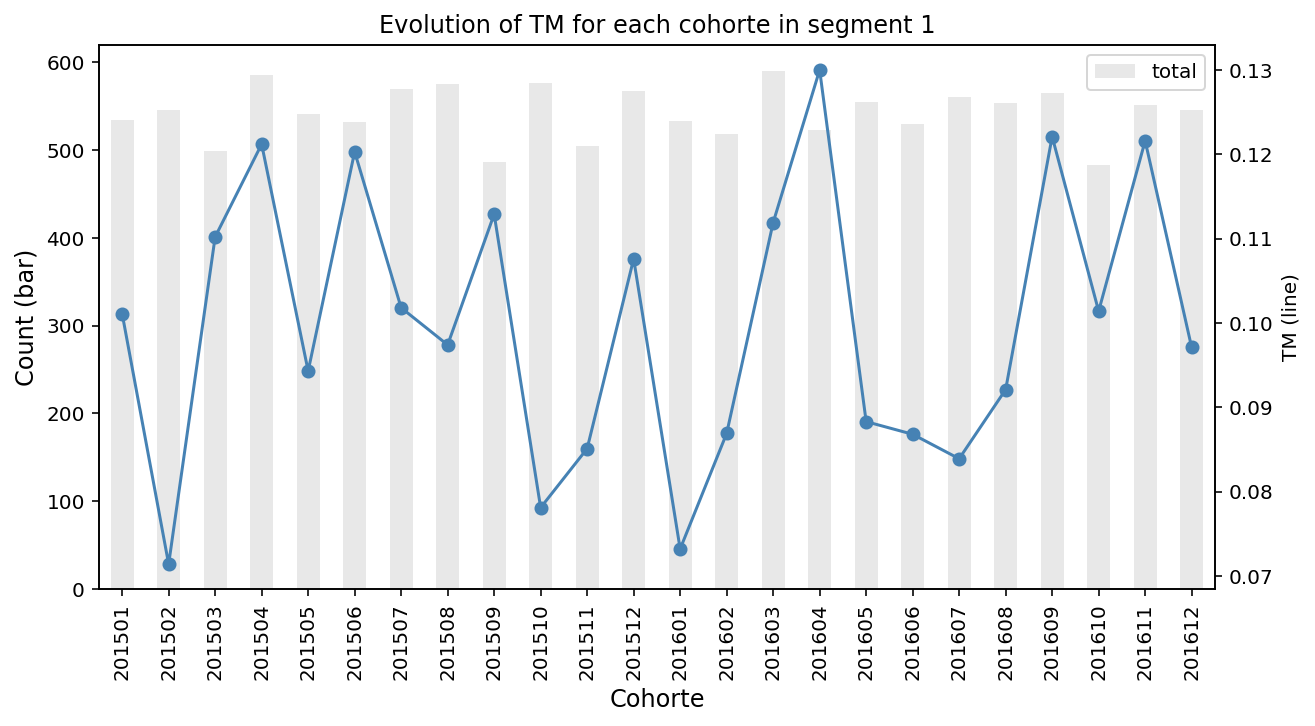

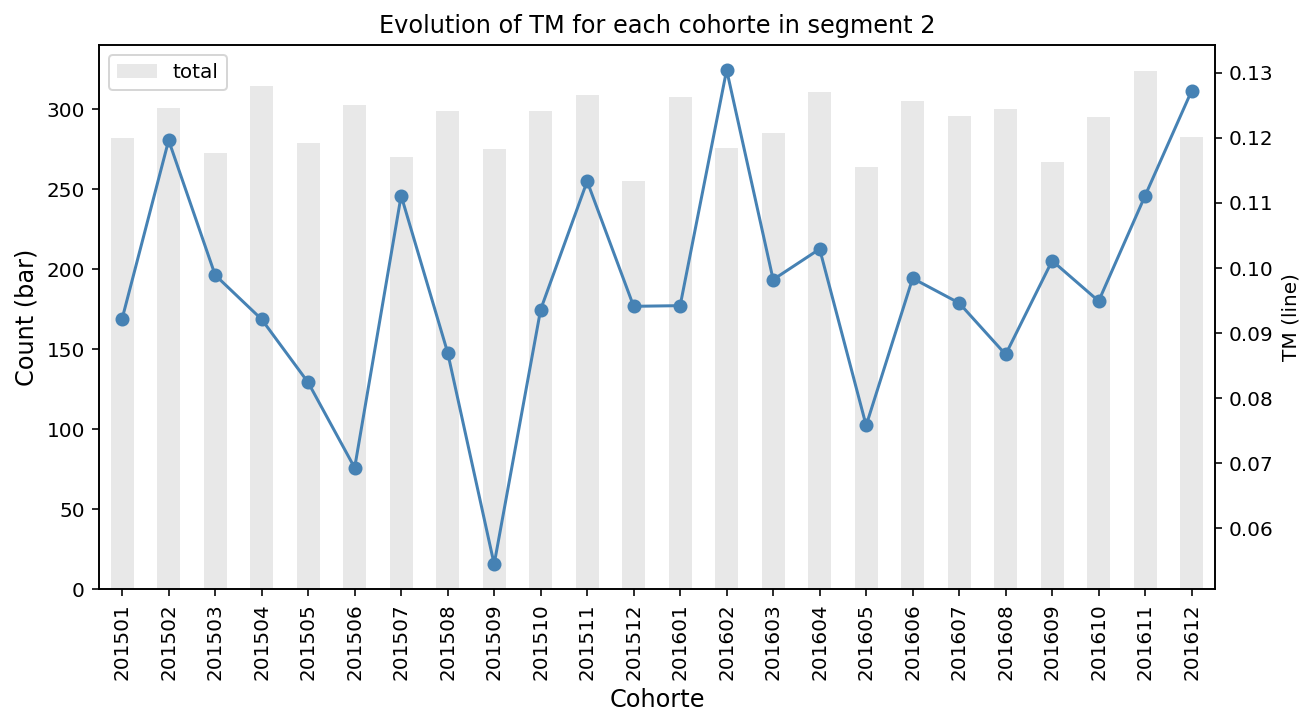

In [36]:
z_plot = Utilerias.evol_cohorte_plot(z, "./outputs/")

## TM by segments

In [37]:
param_dict = {"checkpoints2":{"var_segm":"segmento",
                              "var_sample":"muestra"},
              "var_obj":"incmpl_d"}

In [39]:
%%time
x = two.tmora_seg(df, param_dict)
print("----------")

tmora for each segment was competed.
----------
CPU times: user 10.8 ms, sys: 3.94 ms, total: 14.8 ms
Wall time: 820 ms


In [40]:
x

,muestra,segmento,total,bads,goods,TM
0,Train,1,8995,927,8068,0.10306
1,Test,1,4031,374,3657,0.09278
2,Train,2,4863,465,4398,0.09562
3,Test,2,2111,211,1900,0.09995


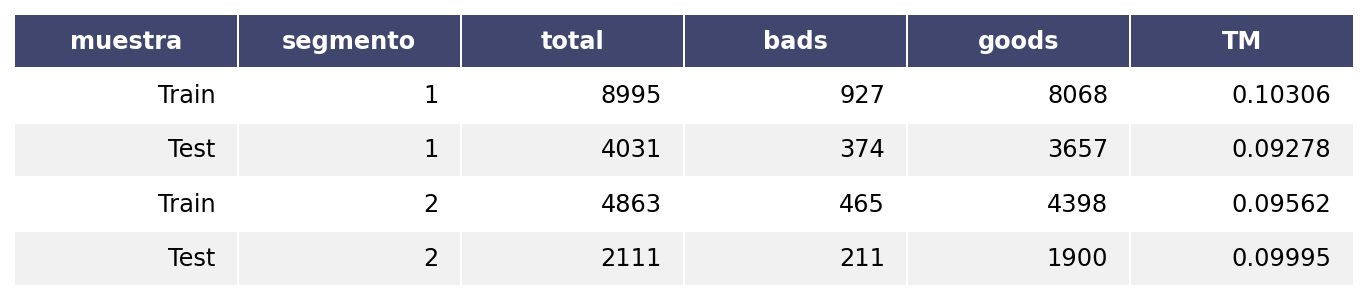

In [41]:
Utilerias.tmora_seg_table(x, "./outputs/")

# Stability index between train and test samples

In [42]:
df = df.select("*",
               F.when(F.col("muestra")=="Train", F.lit(1)).otherwise(F.lit(2)).alias("dummy"))

In [43]:
df.groupBy("dummy").count().show()

+-----+-----+
|dummy|count|
+-----+-----+
|    1|13858|
|    2| 6142|
+-----+-----+



In [44]:
var_interes = ['num_1','num_2','num_3']
list_espvalues = [-99999999,-99999998,-99999997,-99999996,-99999995,-99999994,-99999993,-99999992,-99999991,-99999990]

In [45]:
param_dict = {"checkpoints2":{"var_interes": var_interes,
                              "var_segm": "dummy",
                              "cant_percent": 5},
              "special_values":{"num_1": list_espvalues,
                                "num_2": list_espvalues,
                                "num_3": list_espvalues}}

In [47]:
%%time
a = two.indice_estab_percentil(df, param_dict)
print("----------")

For IE, the segments to analize are: [1, 2]
indice_estab analysis for num_1 ready!
indice_estab analysis for num_2 ready!
indice_estab analysis for num_3 ready!
IE analysis was completed.
----------
CPU times: user 68.3 ms, sys: 19.5 ms, total: 87.9 ms
Wall time: 5.97 s


In [48]:
a[1].head()

,Perc,Frequency_X,Proportion_X,Frequency_Y,Proportion_Y,IE,Variable
0,0.0,2771,0.2,1240,0.202,0.000020,num_1
1,1.0,2772,0.2,1177,0.192,0.000327,num_1
2,4.0,2773,0.2,1250,0.204,0.000079,num_1
3,3.0,2771,0.2,1262,0.205,0.000123,num_1
4,2.0,2771,0.2,1213,0.197,0.000045,num_1


In [49]:
a[2]

,Variable,IE
0,num_1,0.000594
1,num_2,0.000965
2,num_3,0.000393


# PSI

In [50]:
list_espvalues = [-99999999,-99999998,-99999997,-99999996,-99999995,-99999994,-99999993,-99999992,-99999991,-99999990]
var_interes = ["num_1","num_2","num_3"]

In [51]:
param_dict = {"checkpoints2":{"var_interes": var_interes,
                              "var_cohorte": "cohorte",
                              "cohorte_base": 201501,
                              "cant_percent": 5,
                              "especial_values": {"num_1": list_espvalues,
                                                  "num_2": list_espvalues,
                                                  "num_3": list_espvalues}}}

In [52]:
%%time
b = two.psi_table_percentil(df, param_dict)
print("----------")

For PSI table, the cohorte base asigned is: 201501
PSI for num_1 ready!
PSI for num_2 ready!
PSI for num_3 ready!
PSI table analysis was completed.
----------
CPU times: user 85.7 ms, sys: 15.1 ms, total: 101 ms
Wall time: 5.01 s


In [53]:
b[1]

[0.2, 0.4, 0.6, 0.8]

In [54]:
b[2]

[[-inf, -0.6826, 0.9093, 2.4007, 4.0741, inf],
 [-inf, -0.3182, 1.7281, 3.4815, 5.9325, inf],
 [-inf, 0.2592, 2.6566, 4.8124, 8.0661, inf]]

In [55]:
b[3].head(5)

,cohorte,Q,Freq,Total,Proportion,Variable
0,201501,4.0,164,816,0.20098,num_1
1,201505,3.0,150,820,0.18293,num_1
2,201509,2.0,143,762,0.18766,num_1
3,201507,4.0,178,840,0.21190,num_1
4,201602,0.0,160,794,0.20151,num_1


In [56]:
b[4]

['num_1', 'num_2', 'num_3']

In [57]:
b[3][["Variable","Q"]].groupby("Variable", as_index=False).count()

,Variable,Q
0,num_1,120
1,num_2,120
2,num_3,120


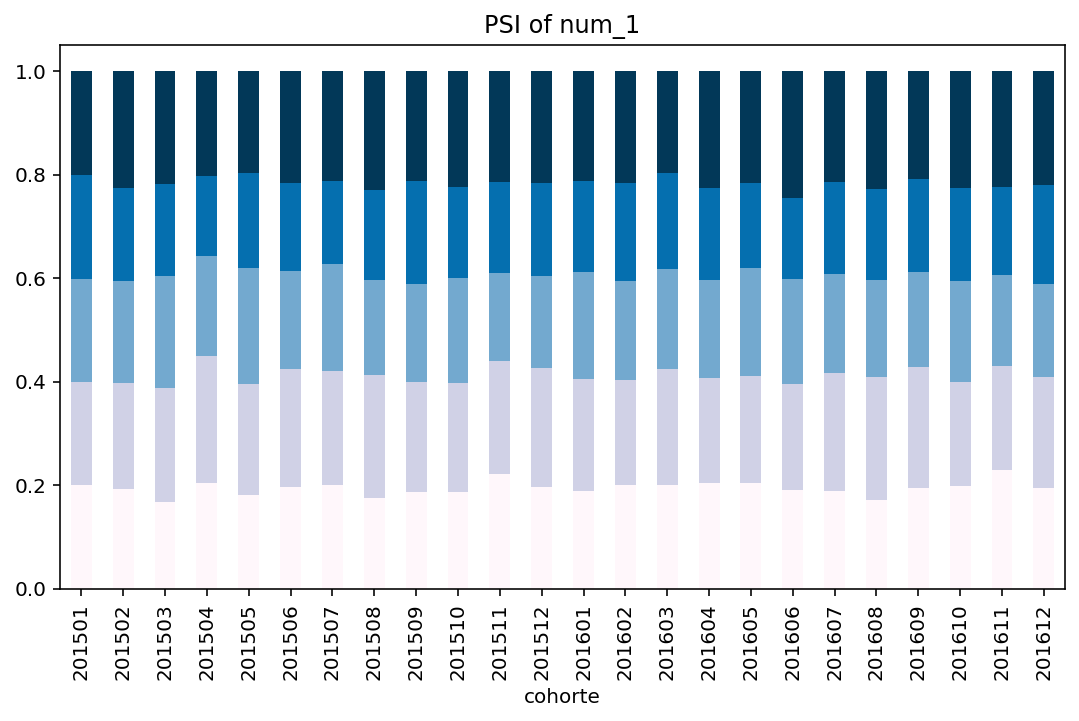

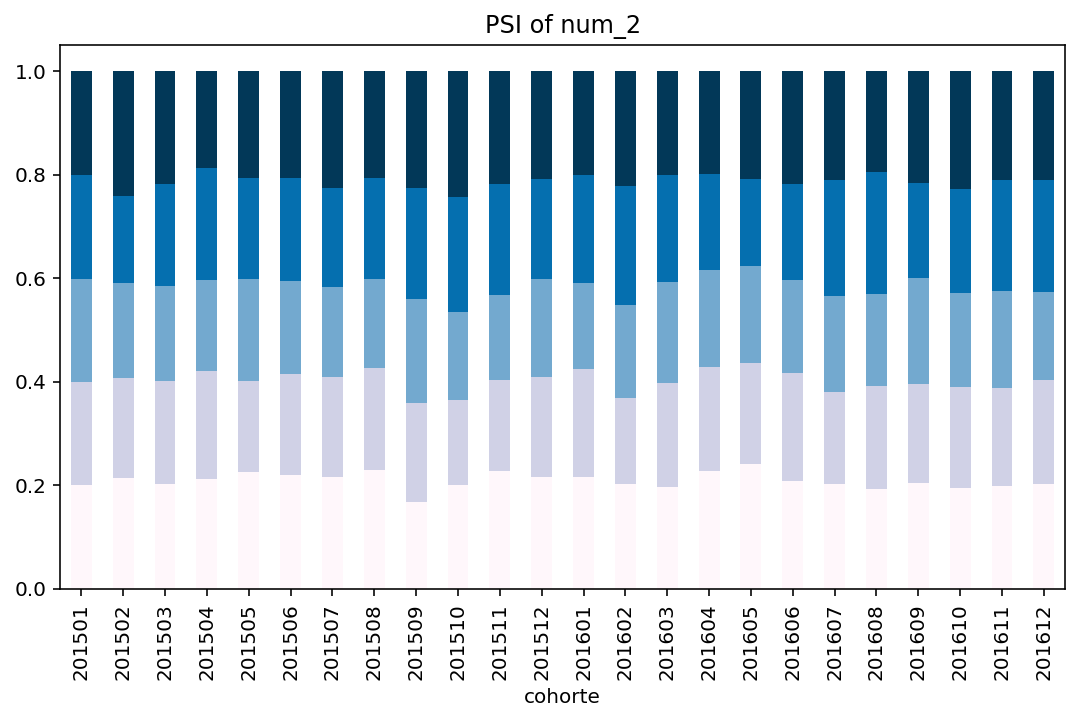

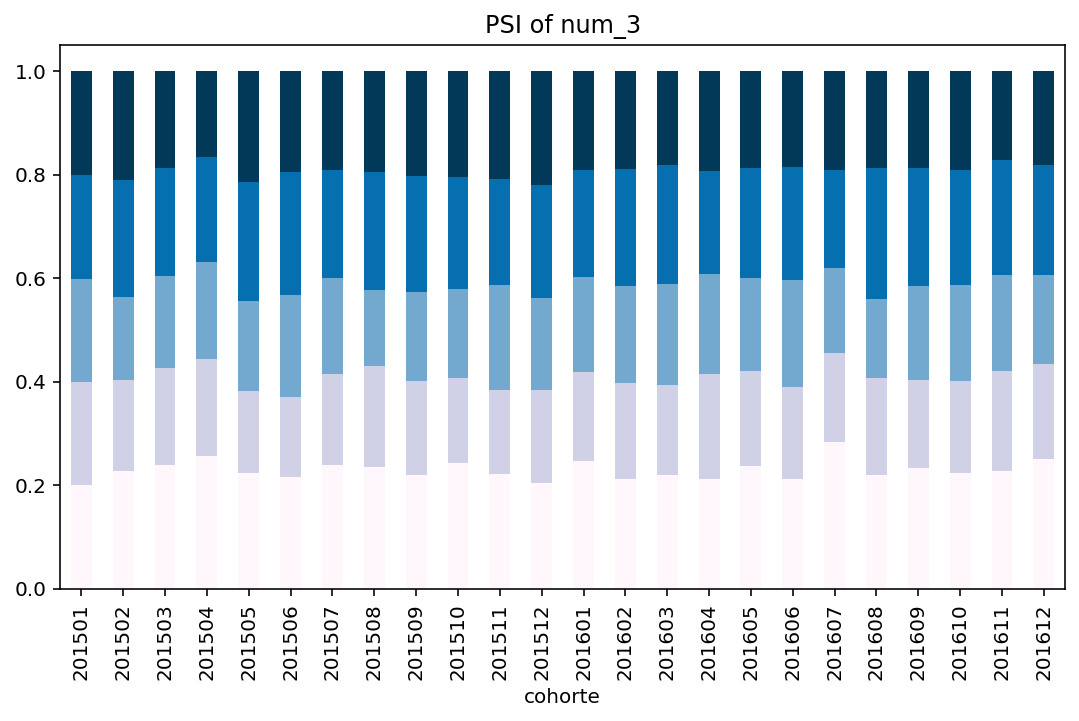

In [58]:
Ruta = "./outputs/"
c = Utilerias.psi_plot(b, Ruta)

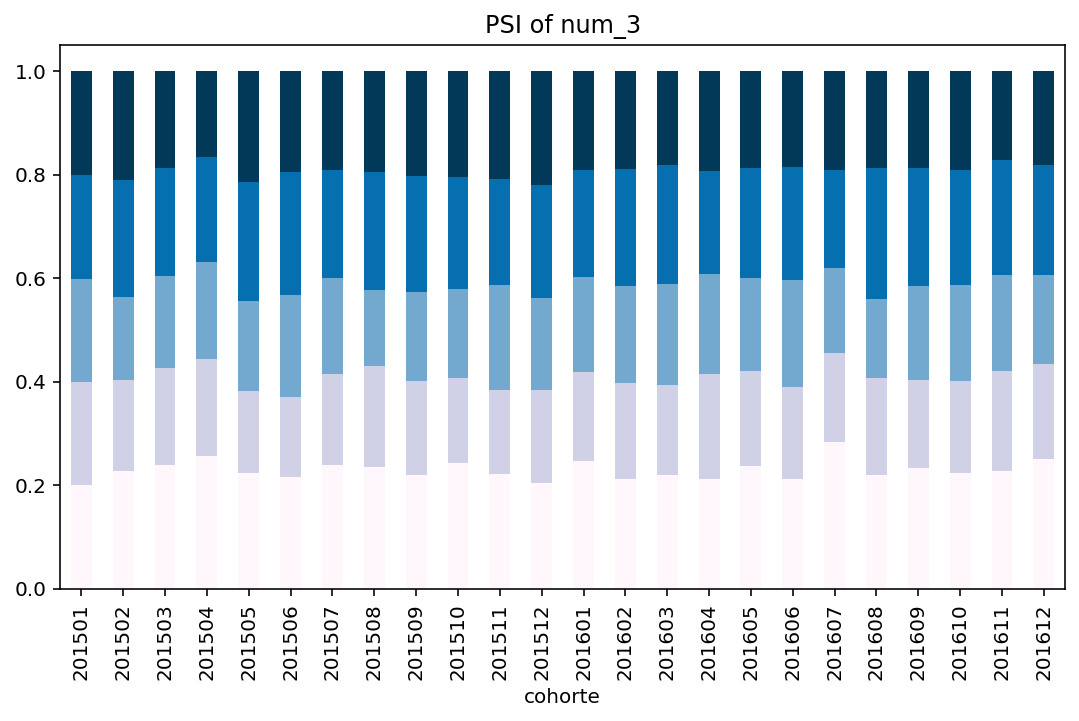

In [59]:
c[2].figure